# Module 6. Data Cleaning and Preparation

<sub><sup>The notebook is prepared based on the seventh chapter of McKinney, M. (2017). Python for Data Analysis, O'Reilly. ISBN 9781491957660.</sup></sub>

Large portion of Data Analysis is taken up by preparation: loading, cleaning, transforming and rearranging.

These tasks take up more than 80% of an analyst's time depending on the data that you work on. This is because the way the data is stored in files or databases is not in the right format.

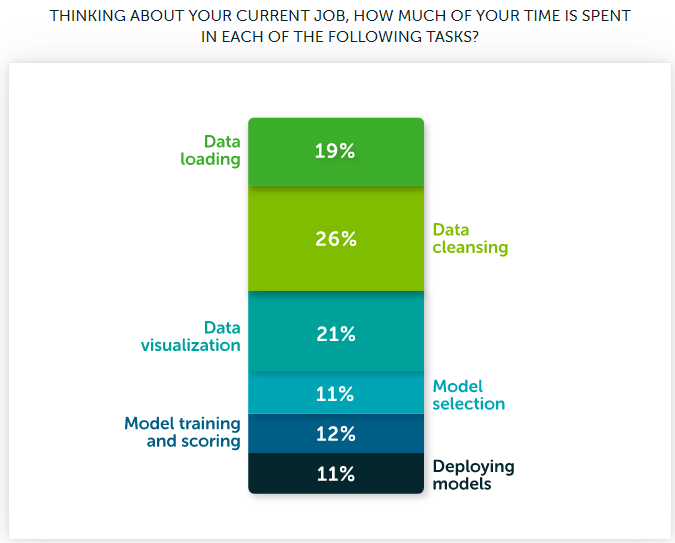

<sub><sup>[Retrieved from [2020 State of Data Science report](https://www.anaconda.com/state-of-data-science-2020?utm_medium=press&utm_source=anaconda&utm_campaign=sods-2020&utm_content=report) of Anaconda]</sub></sup>

`pandas` with built-in Python features provides high-level, flexible abd fast set of tools that enables you to manipulate data into right form.

# 1. Handling missing data

Missing data occurs commonly in many data analysis applications. For example, some logs might be corrupted or the system might crush and fail to collect user interaction data.

When cleaning up data for analysis, it is often important to do analysis on the missing data itself to identify data collection problems or potential biases in the data caused by missing data.

One of the goals of `pandas` is to make working with missing data as painless and efficient as possible. For example, all of the descriptive statistics on `pandas` objects exclude missing data by default.

In pandas, missing data is referred to as NA, which stands for not available.

For numeric data, pandas uses the floating-point
value `NaN` (**Not a Number**) to represent missing data. 

The following example creates a Series object with one missing value.

In [80]:
import pandas as pd
import numpy as np

string_data = pd.Series(['aardvak', 'artichoke', np.nan, 'avocado'])
string_data

0      aardvak
1    artichoke
2          NaN
3      avocado
dtype: object

There are multiple ways to create a missing data. In addition to `np.nan` that we used above, you can also use built-in Python `None` value or the `NA` object that comes with pandas. However, most of the time `np.nan` will be quite sufficient.

In [ ]:
string_data[0] = None #python builtin value
string_data[1] = pd.NA #pandas missing value

You can use `isnull` function to return a boolean same-sized object  indicating if the values are `NA`. NA values, such as `None` or `numpy.NaN`, gets mapped to `True` values. Everything else gets mapped to `False` values.

In [ ]:
string_data.isnull()

0     True
1     True
2     True
3    False
dtype: bool

There are several functions in pandas for handling missing data, as listed in the following table. In the subsequent section, these functions are covered.

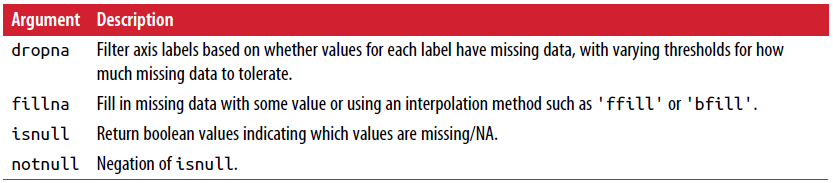

## 1.1. Filtering Out Missing Data

We always have the option to filter out missing data by hand using `isnull` and boolean indexing.



In [ ]:
string_data[string_data.notnull()]

3    avocado
dtype: object

However, for getting rid of the null values the `dropna` function is the most preferred method. 

For a Series it returns the Series with only non-null data and index values.

In [ ]:
string_data.dropna()

3    avocado
dtype: object

When creating a missing value, you can avoid typing `np.nan` by importing the `nan` object with an abbreviation (such as `NA`). 

Here is how you can do it:

In [ ]:
from numpy import nan as NA

For DataFrame, droping a row (or column) is a bit more complex. 

By default, `dropna` will drop any row that contains even 1 missing value. 

Let's build a new dataframe with some missing value and apply the `dropna` function on it. 

As you see below, we can just write `NA` to indicate missing values.

In [ ]:
data = pd.DataFrame([[1., 6.5, 3.], 
                     [1., NA, NA],
                     [NA, NA, NA], 
                     [NA, 6.5, 3.]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


Now we can apply `dropna` to clean the missing values. This will remove all rows and columns where at least there is one missing value.

In [ ]:
cleaned = data.dropna()
cleaned

,0,1,2
0,1.0,6.5,3.0


You can delete the rows only if the all column values are missing by passing `how='all'`

In [ ]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


You can also apply the same procedure on columns. Before we try it, let's first create a new column with all NA values.

In [ ]:
data[4] = NA
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN



To drop columns, all you need to do is to pass `axis=1`. The following code will delete Column 4 (since it has only NA values).

In [ ]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


A very useful way to filter out DataFrame rows is to keep the rows with a certain number of non-missing values.  

You can indicate this number with the `thresh` argument:

Let's build a dataframe and try the `thresh` argument.

In [ ]:
df = pd.DataFrame(np.random.randn(7,3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA

df

,0,1,2
0,-0.609784,NaN,NaN
1,-0.304959,NaN,NaN
2,0.874100,NaN,1.188602
3,0.160932,NaN,1.315234
4,-0.656137,1.529515,-0.299454
5,-0.830472,-1.598782,-0.132754
6,-0.334871,-0.874550,2.034967


First, apply dropna and check the output.

In [ ]:
df.dropna()

,0,1,2
4,-0.656137,1.529515,-0.299454
5,-0.830472,-1.598782,-0.132754
6,-0.334871,-0.874550,2.034967


Now, pass `thresh=2` to dropna function and observe the results. 

The rows with at least 2 non-missing values should be retained.

In [ ]:
df.dropna(thresh=2)

,0,1,2
2,0.874100,NaN,1.188602
3,0.160932,NaN,1.315234
4,-0.656137,1.529515,-0.299454
5,-0.830472,-1.598782,-0.132754
6,-0.334871,-0.874550,2.034967


<h3 style="color:#cccc;">In-class Exercise [Cont'd]</h3>

As the in-class exercise we will work on a dataset which includes students' visits to different modules on a specific course day.

Please import the data using `read_excel` function:

In [81]:
studentVisits = pd.read_excel("student-visits.xlsx")
studentVisits.head()

,StudentId,CourseDay,Modules
0,10,29.0,3.0
1,19,43.0,6.0
2,19,12.0,3.0
3,12,12.0,5.0
4,18,2.0,4.0


In [82]:
studentVisits.shape

(1000, 3)

In [83]:
studentVisits.dropna(subset = ['StudentId', 'CourseDay'], how = 'any' , inplace = True)
studentVisits.shape

(994, 3)

## 1.2. Filling In Missing Data
Sometimes it is not a good idea to remove NAs since you would lose some important information in the same rows along with the deleted missing data.

Another option is to **fill** in the NAs in different ways.

For example, by using `fillna` function, you can pass a scalar value to replace all missing values with.

In [ ]:
df.fillna(0)

,0,1,2
0,-0.609784,0.000000,0.000000
1,-0.304959,0.000000,0.000000
2,0.874100,0.000000,1.188602
3,0.160932,0.000000,1.315234
4,-0.656137,1.529515,-0.299454
5,-0.830472,-1.598782,-0.132754
6,-0.334871,-0.874550,2.034967



If we call `fillna` with a dict, we can fill different value for each column.

In [ ]:
df.fillna({1:0.5, 2: 0})

,0,1,2
0,-0.609784,0.500000,0.000000
1,-0.304959,0.500000,0.000000
2,0.874100,0.500000,1.188602
3,0.160932,0.500000,1.315234
4,-0.656137,1.529515,-0.299454
5,-0.830472,-1.598782,-0.132754
6,-0.334871,-0.874550,2.034967


By default it returns a new object, but we can modify it to change in-place.


In [ ]:
df.fillna(0, inplace=True)
df

,0,1,2
0,-0.609784,0.000000,0.000000
1,-0.304959,0.000000,0.000000
2,0.874100,0.000000,1.188602
3,0.160932,0.000000,1.315234
4,-0.656137,1.529515,-0.299454
5,-0.830472,-1.598782,-0.132754
6,-0.334871,-0.874550,2.034967


The same interpolation methods available for reindexing can be used with `fillna`:

In [ ]:
df = pd.DataFrame(np.random.randn(6,3))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
df

,0,1,2
0,-0.159716,0.544361,-0.713123
1,0.863335,1.108663,0.778436
2,1.323962,NaN,-0.310988
3,1.520916,NaN,-1.105217
4,-1.809319,NaN,NaN
5,-0.937629,NaN,NaN


For example you can apply forward-fill method by passing `method='ffill'` argument inside the `fillna` function:

In [ ]:
df.fillna(method='ffill')

,0,1,2
0,-0.159716,0.544361,-0.713123
1,0.863335,1.108663,0.778436
2,1.323962,1.108663,-0.310988
3,1.520916,1.108663,-1.105217
4,-1.809319,1.108663,-1.105217
5,-0.937629,1.108663,-1.105217


You can limit forward-filling by using the `limit` argument. For example passing `limit=2` should fill only the next two row cells.

In [ ]:
df.fillna(method='ffill', limit=2)

,0,1,2
0,-0.159716,0.544361,-0.713123
1,0.863335,1.108663,0.778436
2,1.323962,1.108663,-0.310988
3,1.520916,1.108663,-1.105217
4,-1.809319,NaN,-1.105217
5,-0.937629,NaN,-1.105217


With `fillna` you can do lots of other things with a little creativity. 

For example, you might pass the mean or median value of a Series:

In [ ]:
data = pd.Series([1., NA, 3.5, NA, 7])

data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

See the following table for the arguments of `fillna`.

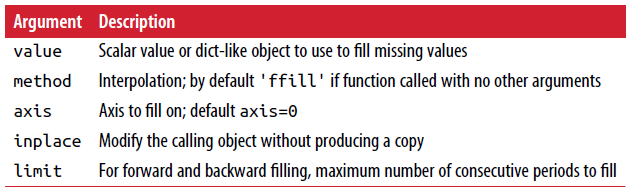

<h3 style="color:#cccc;">In-class Exercise [Cont'd]</h3>

Previously we have checked for the NA values in the student id or course day columns. 

However, there might be some missing values also in the Modules column. 

You can use `any` function along with `isnull` to determine this:

In [84]:
studentVisits['Modules'].isnull().any()

True

Then, let's obtain the total number of records with missing Moduels value:

In [85]:
studentVisits['Modules'].isnull().sum()

6

We will fill these missing values using `ffill` technique. Before that, we will sort the data based on day and student.

In [86]:
studentVisits.sort_values(['StudentId', 'CourseDay'], ascending = True, inplace = True)
studentVisits.head(10)

,StudentId,CourseDay,Modules
193,1,4.0,4.0
403,1,4.0,4.0
39,1,6.0,6.0
639,1,7.0,4.0
985,1,8.0,6.0
911,1,9.0,2.0
681,1,10.0,4.0
993,1,10.0,5.0
101,1,11.0,1.0
262,1,12.0,1.0


Now, we can fill the missing values using `ffill` technique. 

In [87]:
studentVisits['Modules'].fillna(method='ffill', inplace = True)

Check again to make sure all missing values are being filled: 

In [88]:
studentVisits['Modules'].isnull().any()

False

# 2. Data Transformation
Till now we have seen methods for rearranging data.

Transformation involves filtering, cleaning and other different functions.

## 2.1. Removing Duplicates

Many times your data will have duplicate rows (i.e., duplicate data). `pandas` offers a variety of functions to deal with them. 

Let's first create a `DataFrame` with duplicate rows:

In [ ]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                    'k2': [1,1,2,3,3,4,4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


The DataFrame method `duplicated` returns a boolean Series object indicating if each (*entire*) row is a duplicate (i.e. observed in a previous row) or not. That means, by default all of the columns are considered when determining the duplicate rows.

In [ ]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

You could use this boolean Series to filter out the duplicate values as shown below.

In [ ]:
data[data.duplicated() == False]

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


A better approach is to use `drop_duplicates` to get rid of the duplicate rows.

In [ ]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


You can also specify any subset of the DataFrame to detect duplicates.

In [ ]:
data['v1'] = range(7)
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


By default, both keep the *first observation* in case of duplicates. We can specify `keep='last'` to instead keep the *last* observation.

In [ ]:
data.drop_duplicates(['k1', 'k2'], keep='last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


<h3 style="color:#cccc;">In-class Exercise [Cont'd]</h3>

In the student visits data, we will consider a student's visits to the same module on the same day as a possible duplicate. 

We should drop such duplicate records:

In [89]:
studentVisits.drop_duplicates(keep = 'last', inplace = True)
studentVisits.shape

(913, 3)

## 2.2. Transforming Data Using a Function or Mapping
We sometimes need to make transformations based on the values present in an array, Series or column in a DataFrame. For example, you can add an additional column to insert more information or change and existing column.

We can use the `map` method with a `dict-like` object having the mapping to add or change a column.

For example, below we generate a new data holding student population for different departments.

In [ ]:
data = pd.DataFrame({'department': ['CEIT', 'eds', 'Eece',
                             'ceng', 'CE', 'Chem',
                            'ae', 'Hist', 'pes'],
                    'student population': [200, 250, 240, 350, 355, 290, 265, 310, 300]})
data

,department,student population
0,CEIT,200
1,eds,250
2,Eece,240
3,ceng,350
4,CE,355
5,Chem,290
6,ae,265
7,Hist,310
8,pes,300


We have the following dictionary that holds the mapping data between the departments and their faculties.

In [ ]:
dept_to_facult = {
    'ceit': 'Education',
    'eece': 'Education',
    'eds': 'Education',
    'pes': 'Education',
    'ceng': 'Engineering',
    'ce': 'Engineering',
    'ae': 'Engineering',
    'chem': 'Art and Sciences',
    'hist': 'Art and Sciences'
}

Our goal is to insert the Faculty information to our dataset as a new column. The final dataframe should look like this:

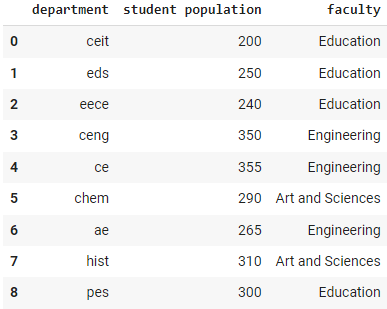

However, we have a small problem. You might have noticed that in our dataset department names have a varying case (mix of lowercases and uppercases), whereas in our mapping data all of them are lowercase.

In this case, we need to convert all the column values to lowercase using the `str.lower` Series method.

In [ ]:
data['department'] = data['department'].str.lower()
data

,department,student population
0,ceit,200
1,eds,250
2,eece,240
3,ceng,350
4,ce,355
5,chem,290
6,ae,265
7,hist,310
8,pes,300


In [ ]:
data['faculty'] = data['department'].map(dept_to_facult)
data

,department,student population,faculty
0,ceit,200,Education
1,eds,250,Education
2,eece,240,Education
3,ceng,350,Engineering
4,ce,355,Engineering
5,chem,290,Art and Sciences
6,ae,265,Engineering
7,hist,310,Art and Sciences
8,pes,300,Education


Optionally, you could write a `lambda` expression to perform all the tasks at once:

In [ ]:
data['faculty'] = data['department'].apply(lambda x: dept_to_facult[x.lower()])
data

,department,student population,faculty
0,ceit,200,Education
1,eds,250,Education
2,eece,240,Education
3,ceng,350,Engineering
4,ce,355,Engineering
5,chem,290,Art and Sciences
6,ae,265,Engineering
7,hist,310,Art and Sciences
8,pes,300,Education


<h3 style="color:#cccc;">In-class Exercise [Cont'd]</h3>

We have students' grade data in the following dictionary. Based on this data, we want to add the grade column to student visits dataframe.

In [90]:
studentIdToGrade = {
   1: 40,
   2: 30,
   3: 80,
   4: 60,
   5: 40,
   6: 90,
   7: 70,
   8: 20,
   9: 90,
   10: 90,
   11: 80,
   12: 60,
   13: 90,
   14: 20,
   15: 70,
   16: 60,
   17: 85,
   18: 60,
   19: 85,
   20: 75,
}

In [105]:
studentVisits['grade'] = studentVisits['StudentId'].map(studentIdToGrade)
studentVisits

,StudentId,CourseDay,Modules,grade,Module_1.0,Module_2.0,Module_3.0,Module_4.0,Module_5.0,Module_6.0
403,1,4.0,4.0,40,0,0,0,1,0,0
39,1,6.0,6.0,40,0,0,0,0,0,1
639,1,7.0,4.0,40,0,0,0,1,0,0
985,1,8.0,6.0,40,0,0,0,0,0,1
911,1,9.0,2.0,40,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
48,20,44.0,6.0,75,0,0,0,0,0,1
354,20,44.0,2.0,75,0,1,0,0,0,0
615,20,44.0,5.0,75,0,0,0,0,1,0
212,20,45.0,3.0,75,0,0,1,0,0,0


In [106]:
studentVisits['StudentId'].apply(lambda x: studentIdToGrade[x])

403    40
39     40
639    40
985    40
911    40
       ..
48     75
354    75
615    75
212    75
214    75
Name: StudentId, Length: 913, dtype: int64

## 2.3. Replacing Values
You may remember that we can use the `fillna` method for a special case of more general values replacement: *missing values*.

Although the `map` function modifies a subset of values, `replace` provides simpler and more flexible way to do so.

Let's create a `Series` object to work with:

In [ ]:
data = pd.Series([1., -999., 2., -999., 3.])
data

0      1.0
1   -999.0
2      2.0
3   -999.0
4      3.0
dtype: float64

The -999 values might be sentinel values for missing data. To replace these with NA values that pandas understands, we can use `replace`, producing a *new* Series (unless you pass `inplace=True`):

In [ ]:
data.replace(-999, np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    3.0
dtype: float64

If you want to replace multiple values at once, you instead pass a list and then the substitute value:

In [ ]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    3.0
dtype: float64

To use a different replacement for each value, pass a list of substitutes:

In [ ]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    3.0
dtype: float64

The argument passed can also be a dict:

In [ ]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    3.0
dtype: float64

## 2.4. Renaming Columns and Row Indices
Just like values, axis labels can also be transformed by a function or mapping to produce differntly labeled objects.

Let's first create our sample data which holds students' video activities:

In [ ]:
np.random.seed(5)
data = pd.DataFrame(np.random.randint(50, size=12).reshape((3,4)),
                   index = ['e123432', 'E321233', 'e983293'],
                   columns = ['play', 'pause', 'backward', 'forward'])
data

,play,pause,backward,forward
e123432,35,14,47,38
E321233,16,9,8,36
e983293,39,27,48,30


In this dataset, student id is the index of the DataFrame. What we want is to get rid of the initial letters in the id numbers.

For this purose let's write a lambda function. This function will actually select a substring starting from the second letter.

In [ ]:
transform = lambda x: x[1:]

Now we can apply this function to the indices by calling **`map`** method for `data.index` values.

In [ ]:
data.index = data.index.map(transform)
data

,play,pause,backward,forward
123432,35,14,47,38
321233,16,9,8,36
983293,39,27,48,30


The same task could be completed using `str.slice` method as well. This method returns a substring starting from and ending at indicated indices.

For example, the following code will take a substring starting from the second letter (index 1):

In [ ]:
data.index.str.slice(1)

Index(['23432', '21233', '83293'], dtype='object')

Alternatively, you can use the `rename` function to change the names of row indices or columns.

The advantage of `rename` is that you can directly pass the str functions as arguments.

For example, the following code will convert all column names to uppercase:

In [ ]:
data.rename(columns=str.upper)

,PLAY,PAUSE,BACKWARD,FORWARD
123432,35,14,47,38
321233,16,9,8,36
983293,39,27,48,30


`rename` is very commonly used to change specific row index or column name using a dict-like syntax as shown below:

In [ ]:
data.rename(index={'123432':"123433"},
           columns = {'play':'PLAY'})

,PLAY,pause,backward,forward
123433,35,14,47,38
321233,16,9,8,36
983293,39,27,48,30


## 2.5. Discretization and Binning
When dealing with continuous numeric data, it is often helpful to bin the data into multiple buckets for further analysis. For example, you may want to separate users based on users age or students based on their performance in an exam.

To bin a set of continuous data in `pandas` you can use the `cut` method.

In below example, we are binnning set of ages into 4 groups with the following boundry values: 

`18 to 25`, `26 to 35`, `36 to 60` and `61 and older`.

In [ ]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]

cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

`pandas` returns a special `Categorical` object from `cut` function. In this object, categories are defined as shown in the output above:

`[(18, 25] < (25, 35] < (35, 60] < (60, 100]]`.

The output describes the bins that each of the element is in. You can treat it like a bin name for each element.

The interval system for cut is consistent with the mathematical notation. The meaning of the `(]` syntax is illustrated in the following visual.

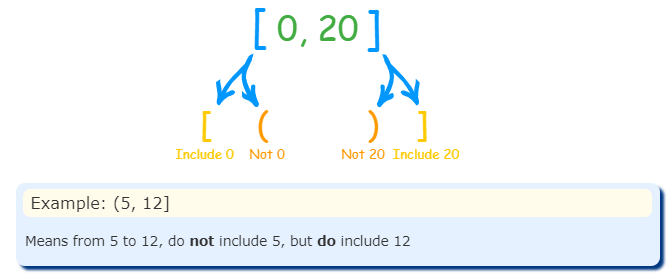

Retrieved from https://www.mathsisfun.com/sets/intervals.html

`categories` property returns the definition of the categories as `IntervalIndex` object:

In [ ]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')

The `codes` property of the `cats` object contains an array specifying distinct category that each age item belongs to. 0 refers to the first category, 1 refers to the second category, and so on.

In [ ]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

`pd.value_counts(cats)` will get you the bin counts for the result of `pandas.cut`.

In [ ]:
pd.value_counts(cats)

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

You can chooce which side is included by passing `right=False`.


In [ ]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64, left]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

You can also pass your own bin names by passing a list or array to the `labels` option:

In [ ]:
group_names = ['Youth', 'YoungAdult', 'MiddleAges', 'Senior']
pd.cut(ages, bins, labels=group_names)

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAges', 'MiddleAges', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAges' < 'Senior']

Instead of specifying specific intervals, we can just pass an integer to get equal length bins of the same number based on the max and min value of the data.

The `precision` parameter limits decimal precision in the values. `precision=2` limits decimal precision to 2 digits.

In [ ]:
data = np.random.rand(20)
data

array([0.486638  , 0.99082093, 0.80828168, 0.64945888, 0.81947279,
       0.24254041, 0.76437261, 0.11090076, 0.20415475, 0.11909536,
       0.87790307, 0.52367529, 0.492136  , 0.7318711 , 0.01458075,
       0.09336303, 0.82655425, 0.83349274, 0.89241102, 0.9580135 ])

In [ ]:
cats = pd.cut(data, 4, precision=2)
cats

[(0.26, 0.5], (0.75, 0.99], (0.75, 0.99], (0.5, 0.75], (0.75, 0.99], ..., (0.014, 0.26], (0.75, 0.99], (0.75, 0.99], (0.75, 0.99], (0.75, 0.99]]
Length: 20
Categories (4, interval[float64, right]): [(0.014, 0.26] < (0.26, 0.5] < (0.5, 0.75] < (0.75, 0.99]]

<h3 style="color:#cccc;">In-class Exercise [Cont'd]</h3>

Now, we want to group students based on their performance level into the following bins: [0, 60, 80, 100]

In [107]:
studentGrades = studentVisits.drop_duplicates(subset = ['StudentId'])[['StudentId', 'grade']]
studentGrades.head(5)

,StudentId,grade
403,1,40
243,2,30
578,3,80
607,4,60
490,5,40


In [108]:
bins= [0, 60, 70, 80, 90, 100]
letterGrades = ['F', 'D', 'C', 'B', 'A']
cats = pd.cut(studentGrades['grade'], bins, labels = letterGrades, right = False)
cats

403    F
243    F
578    B
607    D
490    F
929    A
144    C
580    F
271    A
597    A
950    B
860    D
187    A
794    F
854    C
837    D
901    B
246    D
646    B
813    C
Name: grade, dtype: category
Categories (5, object): ['F' < 'D' < 'C' < 'B' < 'A']

In [109]:
studentGrades['LetterGrade'] = cats
studentGrades.head()

,StudentId,grade,LetterGrade
403,1,40,F
243,2,30,F
578,3,80,B
607,4,60,D
490,5,40,F


`cut` has a closely related function called **`qcut`** that bins data based on sample quantiles.

Based on distribution, using `cut` will not usually result in each bin have the same number of data points.

As `qcut` uses sample quantiles, you wil roughly obtain equal-size bins.

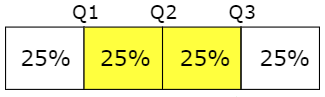

We can even pass our own quantiles to `qcut`.

In [110]:
data = [4, 17, 7, 14, 18, 12, 3, 16, 10, 5, 4, 11]
cats = pd.qcut(data, 4)
cats

[(2.999, 4.75], (14.5, 18.0], (4.75, 10.5], (10.5, 14.5], (14.5, 18.0], ..., (14.5, 18.0], (4.75, 10.5], (4.75, 10.5], (2.999, 4.75], (10.5, 14.5]]
Length: 12
Categories (4, interval[float64, right]): [(2.999, 4.75] < (4.75, 10.5] < (10.5, 14.5] <
                                           (14.5, 18.0]]

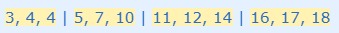

In [111]:
pd.value_counts(cats)

(2.999, 4.75]    3
(4.75, 10.5]     3
(10.5, 14.5]     3
(14.5, 18.0]     3
dtype: int64

If you want to learn more about `cut` and `qcut` functions, you can read the following resources: https://pbpython.com/pandas-qcut-cut.html

<h3 style="color:#cccc;">In-class Exercise [Cont'd]</h3>

Now, we want to divide students into 4 equal quartile based on their performance.

In [112]:
cats = pd.qcut(studentGrades.grade, 4)
cats

403    (19.999, 55.0]
243    (19.999, 55.0]
578      (70.0, 85.0]
607      (55.0, 70.0]
490    (19.999, 55.0]
929      (85.0, 90.0]
144      (55.0, 70.0]
580    (19.999, 55.0]
271      (85.0, 90.0]
597      (85.0, 90.0]
950      (70.0, 85.0]
860      (55.0, 70.0]
187      (85.0, 90.0]
794    (19.999, 55.0]
854      (55.0, 70.0]
837      (55.0, 70.0]
901      (70.0, 85.0]
246      (55.0, 70.0]
646      (70.0, 85.0]
813      (70.0, 85.0]
Name: grade, dtype: category
Categories (4, interval[float64, right]): [(19.999, 55.0] < (55.0, 70.0] < (70.0, 85.0] <
                                           (85.0, 90.0]]

In [113]:
pd.value_counts(cats)

(55.0, 70.0]      6
(19.999, 55.0]    5
(70.0, 85.0]      5
(85.0, 90.0]      4
Name: grade, dtype: int64

## 2.6. Computing Indicator / Dummy Variables
Another transformation is to generate **dummy** variables from a categorical variable. A dummy variable is a variable that takes values of 0 and 1, where the values indicate the presence or absence of something (such as, 1: Success, 0: Failure)

If a column has 3 distinct values, we can derive 3 distinct dummy variable (as columns in a DataFrame), all containing 1s and 0s.

    Plant Types           Plant TypeA TypeB TypeC              
    1     TypeA            1     1     0     0
    2     TypeB            2     0     1     0
    3     TypeC            3     0     0     1

pandas has the `get_dummies` function to produce dummy variables.

Let's work on an example to understand how this function works:

In [ ]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                  'data1': range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [ ]:
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In some cases, you may want to add a prefix to make the column names more explanatory (column names are actually the names of the dummy variables).

`get_dummies` has a `prefix` argument for doing this:

In [ ]:
dummies = pd.get_dummies(df['key'], prefix='key')
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


<h3 style="color:#cccc;">In-class Exercise [Cont'd]</h3>

Let's create a dummy variable indicating if a student visited a specific module or not.

In [114]:
dummyVisits = pd.get_dummies(studentVisits['Modules'], prefix = "Module")
dummyVisits

,Module_1.0,Module_2.0,Module_3.0,Module_4.0,Module_5.0,Module_6.0
403,0,0,0,1,0,0
39,0,0,0,0,0,1
639,0,0,0,1,0,0
985,0,0,0,0,0,1
911,0,1,0,0,0,0
...,...,...,...,...,...,...
48,0,0,0,0,0,1
354,0,1,0,0,0,0
615,0,0,0,0,1,0
212,0,0,1,0,0,0


In [122]:
studentVisits = studentVisits.join(dummyVisits);
studentVisits.head()

,StudentId,CourseDay,Modules,grade,Module_1.0,Module_2.0,Module_3.0,Module_4.0,Module_5.0,Module_6.0
403,1,4.0,4.0,40,0,0,0,1,0,0
39,1,6.0,6.0,40,0,0,0,0,0,1
639,1,7.0,4.0,40,0,0,0,1,0,0
985,1,8.0,6.0,40,0,0,0,0,0,1
911,1,9.0,2.0,40,0,1,0,0,0,0


Another useful method in statistical applications is to combine the dummy function with discretization function like `cut`. This shows if a value is present in a bin or not.

For below example we will use random seed to make the example more deterministic.

In [ ]:
np.random.seed(12345)
values = np.random.rand(10)
values

array([0.92961609, 0.31637555, 0.18391881, 0.20456028, 0.56772503,
       0.5955447 , 0.96451452, 0.6531771 , 0.74890664, 0.65356987])

In [ ]:
bins = [0, 0.5, 1]
cats = pd.cut(values, bins)
cats

[(0.5, 1.0], (0.0, 0.5], (0.0, 0.5], (0.0, 0.5], (0.5, 1.0], (0.5, 1.0], (0.5, 1.0], (0.5, 1.0], (0.5, 1.0], (0.5, 1.0]]
Categories (2, interval[float64, right]): [(0.0, 0.5] < (0.5, 1.0]]

In [ ]:
pd.get_dummies(cats)

,"(0.0, 0.5]","(0.5, 1.0]"
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


## 2.7. Detecting and Filtering Outliers

"**Outliers**" are values that "*lie outside*" the other values.

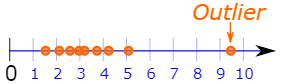

<sub>Retrieved from https://www.mathsisfun.com/data/outliers.html</sub>

> Example: Someone like Elon Musk who has a net worth in the billions of dollars would be considered an outlier in terms of annual income.

Outliers affect the **mean**, but not so much the *median* or *mode*.

Consider a DataFrame with some normally distributed data (noted by its mean close to 0):

In [ ]:
data = pd.DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025619,-0.002790,-0.069612,0.065019
std,1.006798,0.996797,0.996400,0.991650
min,-3.184377,-3.745356,-3.428254,-3.548824
25%,-0.641675,-0.644144,-0.774890,-0.596286
50%,0.002073,-0.014664,-0.117489,0.094503
75%,0.680391,0.654328,0.611729,0.777558
max,3.260383,3.927528,3.366626,2.653656


Suppose you wanted to find values in one of the columns exceeding 3 in absolute value:

In [ ]:
col = data[2]
col[np.abs(col) > 3]

520   -3.428254
897    3.366626
Name: 2, dtype: float64

To select all rows having a value exceeding 3, you can use the `any` method on a `boolean` DataFrame:

In [ ]:
np.abs(data) > 3

,0,1,2,3
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,True,False,False,False
4,False,False,False,False
...,...,...,...,...
995,False,False,False,False
996,False,False,False,False
997,False,False,False,False
998,False,False,False,False


In [ ]:
(np.abs(data) > 3).any(axis=1)

0      False
1      False
2      False
3       True
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [ ]:
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
3,3.248944,-1.021228,-0.577087,0.124121
95,0.106061,3.927528,-0.255126,0.854137
100,3.176873,0.959533,-0.975340,-1.116742
303,-0.025907,-3.399312,-0.974657,-0.685312
322,3.260383,0.963301,1.201206,-1.852001
398,-0.196713,-3.745356,-1.520113,-0.346839
497,-3.056990,1.918403,-0.578828,1.847446
520,0.326045,0.425384,-3.428254,-0.296336
584,-3.184377,1.369891,-1.074833,-0.089937
805,0.208011,-0.150923,-0.362528,-3.548824


# 3. String Manipulation
Python is a popular raw data manipulation language due to its ease of use for string and text processing.

Simple text operations can be done using `String` object's built-in methods.

For more complex pattern matching and text manipulations, we can use regular expressions.

`pandas` enable us to apply both `string` and `regex` functions on whole arrays of data.

## 3.1. String Object Methods
In most string manipulation scenarios, inbuilt string methods are mostly sufficient.

As an example, a string can be broken based on a seperator using `split`.

In [ ]:
val = 'a,b,   guido'

val.split(',')

['a', 'b', '   guido']

It is often combined with `strip` to trim out whitespace, including line breaks.

In [ ]:
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

Substrings can be concatenated together using the `+` operator.

However, a more faster and pythonic way to do so is to pass a list or tuple of substrings to the `join` method on the string.

In [ ]:
#Not recommended
first, second, third = pieces
first + '::' + second + '::' + third

'a::b::guido'

In [ ]:
'::'.join(pieces)

'a::b::guido'

Often you need to search through the string data for example finding the names that contain a specific sub-string. 

The `in` keyword is the best way to detect substring. Although, `index` and `find` can also be used.

In [ ]:
'guido' in val

True


There is a major difference between `find` and `index`. `index` returns an Exception if substring is not found. `find` returns `-1`.

In [ ]:
val.index(',')

1

In [ ]:
val.find(':')

-1

In [ ]:
# val.index(':')


`count` returns number of occurences of a particular substring.

In [ ]:
val.count(',')

2


`replace` substitutes occurence of one pattern for another. It is commonly used to delete patterns by passing an empty string as replacement.

In [ ]:
val.replace(',', '::')

'a::b::   guido'

In [ ]:
val.replace(',', '')

'ab   guido'

There are many more built-in String methods in python. They are listed below:

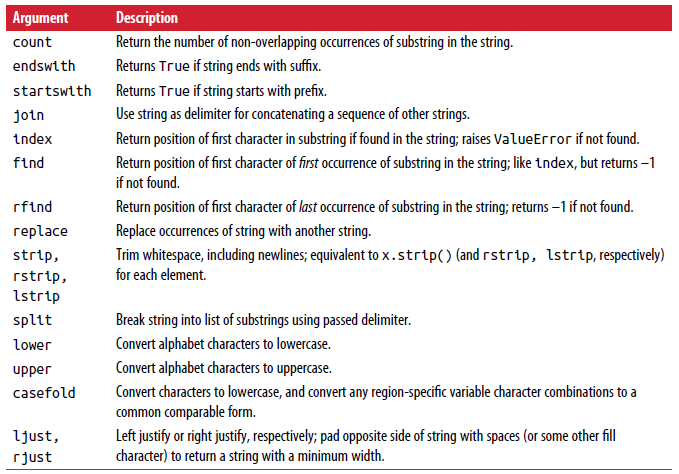

## 3.2. Regular Expression
Regular expressions provide a flexible way to search or match (often more complex) string patterns in text.

A single expression, commonly called a `regex`, is a string
formed according to the regular expression language. Python’s built-in `re` module is responsible for applying regular expressions to strings.

We will cover a number of examples of its use here. 

Let’s look at a simple example:

Suppose we wanted to split a string with a variable number of whitespace characters (tabs, spaces, and newlines). 

The regex describing one or more whitespace characters is `\s+`:

In [ ]:
import re

text = "foo bar\t baz   \tqux"
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

You can compile the regex yourself with `re.compile` to create a *reusable* regex object:

In [ ]:
regex = re.compile('\s+')
regex.split(text)

['foo', 'bar', 'baz', 'qux']

If, instead, you wanted to get a list of all patterns matching the regex, you can use the `findall` method:

In [ ]:
regex.findall(text)

[' ', '\t ', '   \t']

As you see above, all spacing characters that match the regex are returned.

`findall` returns all matches in a string. If you want only the first match, then you should use the `search` function.

Let's explore these functions through a less trivial example. Let’s consider a block of text and a regular expression capable of identifying most email addresses:

In [ ]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""

pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'
regex = re.compile(pattern, flags=re.IGNORECASE)

Understanding how to write proper regular expressions takes time. Therefore, especially for popular fields, such as emails, you can search on Internet to find already available regex and adopt them based on your needs.

`findall` will return a list of matching patterns.

In [ ]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

`search` returns a special match object for the first matching pattern. It can only tell us the start and end positions of the pattern in a string.


In [ ]:
m = regex.search(text)
m

<re.Match object; span=(5, 20), match='dave@google.com'>

`regex.match` returns `None`, as it only will match if the pattern occurs at the start of the string:

In [ ]:
print(regex.match(text))

None


Relatedly, sub will return a new string with occurrences of the pattern replaced by the a new string:

In [ ]:
print(regex.sub('REDACTED', text))

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED



There is much more to regular expressions in Python, most of which is outside the scope of this course.